# MULTIPLE LINEAR REGRESSION & POLYNOMIAL REGRESSION

Sumber : 
- https://www.youtube.com/watch?v=nWJUJenAyB8&ab_channel=IndonesiaBelajar

Multiple Linear regression dan polynomial regression merupakan pengembangan dari model simple linear regression. 

## SAMPLE DATASET 

### TRAINING DATASET

Mempersiapkan dataset untuk digunakan yaitu dataset pizza dengan kolom baru yaitu 'n_topping' yang menunjukkan jumlah topping. Dataset ini terdiri dari diameter, jumlah topping dan harga dari sebuah pizza yang akan ditampung dalam format dataframe. 

Langkah pertama adalah mengimport modul pandas, kemudian menyiapkan dataset yang dibentuk dari suatu dictionary yang terdapat 3 keys didalamnya yaitu diameter, n_topping dan harga. Keys ini menampung sejumlah bilangan. Setelah itu, kita masukkan data pizza ini menjadi sebuah data frame yang kemudian dimasukkan ke dalam suatu variable 'train_pizza_df'.

In [17]:
import pandas as pd 

pizza = {'diameter': [6,8,10,14,18],
        'n_topping':[2,1,0,2,0],
        'harga':[7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


## TESTING DATASET

Kemudian langkah selanjutnya adalah membuat testing dataset yaitu pizza dengan data-data yang berbeda. Disini kita akan menentukan harga pizza berdasarkan diameter dan n_topping. Sehingga diameter dan n_topping menjadi features dan harga menjadi target. 

In [18]:
pizza = {'diameter': [8,9,11,16,12],
        'n_topping':[2,0,2,2,0],
        'harga':[11,8.5,15,18,11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


## PREPROCESSING DATASET

Sebelum memasuki ke dalam tahap proses training model maka kita akan kelompokkan nilai features dan nilai target dari dataset yang kita miliki.
Data diameter dan n_topping akan dikonversikan ke dalam numpy array dan dimasukkan ke dalam variable 'X_train' sebagai sekumpulan nilai features.
Kemudian data harga akan dikonversikan ke dalam numpy array dan dimasukkan ke dalam variable 'y_train' sebagai sekumpulan nilai target untuk training set. Cara ini akan dilakukan pada testing setnya juga.  

Pada output dibawah ini, dapat dilihat bahwa X_train berada dalam format 2 dimensi sedangkan y_trainnya dalam format 1 dimensi. 

In [19]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter','n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train:[ 7.   9.  13.  17.5 18. ]


Berikut adalah output dari testing setnya:

In [20]:
X_test = np.array(test_pizza_df[['diameter','n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test:{y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test:[11.   8.5 15.  18.  11. ]


## MULTIPLE LINEAR REGRESSION

Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables. Perbedaan mendasar dari Simple Linear Regression dengan Multiple Linear Regression terletak pada jumlah features/explanatory variables yang digunakan. 

- Simple Linear Regression menggunakan 1 features untuk melakukan prediksi nilai
- Multiple Linear Regression menggunakan >1 features untuk melakukan prediksi nilai

Langkah yang perlu dilakukan dalam melakukan Multiple Linear Regression adalah:
   - Import modul LinearRegression 
   - import metrics yaitu r2_score
   - Kemudian membentuk objek model yang ditampung dalam variable 'model'
   - Melakukan proses training model 
   - Setelah model tersebut menjadi trained model maka model tersebut akan melakukan prediksi (model.predict) terhadap features yang berada pada testing set (X_test). 
   - Hasil prediksi ini akan digunakan untuk mengukur performa dari trained model kita (r2_score)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'r_squared:{r2_score(y_test,y_pred)}')

r_squared:0.7701677731318468


# POLYNOMIAL REGRESSION 

Polynomial Regression memodelkan hubungan antara independent variable X (features) dan dependent variable y (target) sebagai derajat polynomial dalam X. 

## PREPROCESSING DATASET

Pada tahap ini, featuresnya akan dipangkas menjadi 1 features dalam kasus ini yang menjadi features adalah 'diameter' pizza. Dan untuk target pizzanya adalah 'harga' pizza. 

In [22]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train:[ 7.   9.  13.  17.5 18. ]


## POLYNOMIAL REGRESSION : QUADRATIC

Quadratic atau biasa disebut dengan derajat polynomial 2. 
Cubic disebut juga dengan derajat polynomial 3.

### POLYNOMIAL FEATURES 

Pada tahap ini hal yang perlu dilakukan adalah :
   - Mengimport model PolynomialFeatures 
   - Kemudian membentuk objek polynomial featuresnya yang disertai dengan parameter degree yaitu 2 dan dimasukkan ke dalam variable 'quadratic_feature'. Objek 'quadratic_feature' ini akan melakukan transformasi terhadap 'X_train' 
   - Hasil transformnya akan dimasukkan ke dalam variable 'X_train_quadratic'
   

In [23]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



### TRAINING MODEL 

Melakukan proses training model :
- Membuat objek modelnya yang dibentuk dengan cara LinearRegression() yang ditampung ke dalam variable 'model' 
- Kemudian objek model ini kita training dengan memanfaatkan objek features yang sudah kita transformasikan ke dalam polynomial. Oleh karena itu menggunakan 'X_train_quadratic'. 

In [24]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

### VISUALISASI MODEL

Melakukan visualisasi modelnya. 
- Membentuk sederet bilangan mulai dari 0 - 25 sebanyak 100 data point dan kemudian dimasukkan ke dalam variable 'X_vis'
- Kemudian 'X_vis' ini akan dikenakan proses transformasi yang hasil transformasinya dimasukkan ke dalam variable 'X_vis_quadratic'
- Selanjutnya kita akan melakukan prediksi terhadap 'X_vis_quadratic' dimana hasil prediksinya tersebut dimasukkan ke dalam variable 'y_vis_quadratic'
- Kemudian kita akan memvisulisasikan 'X_train' dan 'y_train' sebagai scatter plot (berupa titik). Pada output, terdapat 5 titik yang merepresentasikan 5 data point pada training set
- Kemudian memplotting hasil prediksi dari model kita dimana plottingnya berupa garis berwarna merah
- Setelah itu, kita akan memberikan keterangan lainnya seperti title, xlabel, ylabel, batasan x dan y yang dimulai dari 0-25.  

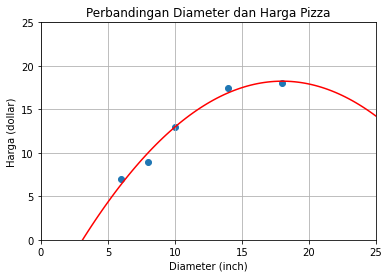

In [25]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0,25,100).reshape(-1,1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train,y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

### POLYNOMIAL REGRESSION: QUADRATIC VS CUBIC

- Training set 
    - Melakukan plotting pada data setnya dan menghasilkan 5 data point untuk training set
- Linear 
    - Membuat objek model yang ditampung ke dalam variable 'model'
    - Lalu modelnya kita training dengan 'X_train' dan 'y_train'
    - Membuat 100 data point dengan jangkauan 0-25 dan direshape kemudian ditampung dalam variable 'X_vis'
    - Kemudian membentuk variable 'y_vis' yang menampung hasil prediksi 'X_vis'
    - Kemudian hasilnya ini akan ditampung secara visual dengan plt.plot-
- Quadratic
    - Perbedaannya adalah penerapan PolynomialFeatures dengan degree = 2 yang dimasukkan pada 'quadratic_feature'
    - Kemudian 'quadratic_feature' ini akan digunakan untuk melakukan fit transform dan hasilnya akan ditampung ke dalam 'X_train_quadratic'
    - Membentuk objek model dan melakukan training dengan menggunakan features yang sudah ditransformasikan ke dalam quadratic polynomial regression
    - Kemudian akan divisualisasikan dengan plotting garis putus-putus berwarna hijau
-Cubic
    - Perbedaannya saat membentuk PolynimialFeatures dengan degree=3 dan untuk semua prosesnya sama persis dengan quadratic

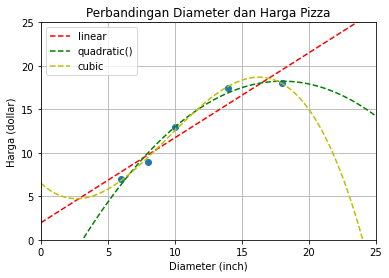

In [26]:
#Training Set
plt.scatter(X_train,y_train)

#Linear
model = LinearRegression()
model.fit(X_train,y_train)
X_vis = np.linspace(0,25,100).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis,y_vis,'--r',label='linear')

#Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic,y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g',label='quadratic()')

#Cubic 
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic,y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis,y_vis,'--y',label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()